<a href="https://colab.research.google.com/github/LuisFelipeLFBS/portifolio_ds/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) nasceu em 2007 quando dois anfitriões, Brian Chesky e Joe Gebbia, co-founders da empresa ao lado de Nathan Blecharczyk, receberam três hóspedes em sua casa em São Francisco. Hoje, a rede hoteleira atinge a marca de 4 milhões de anfitriões que já proporcionaram uma experiência única para cerca de 1 bilhão de hóspedes em praticamente todos os países, **isso sem sequer possuir 1 hotel!**

Os ganhos dessa iniciativa já somam mais de **US$ 180 bilhões de dólares** para os anfitriões (*contabilizado até 30 de Setembro de 2022*), tornando-se, em Dezembro de 2020, uma empresa de capital aberto com ações negociadas na *NASDAQ*.

O Airbnb disponibiliza uma base de dados para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções para *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), cuja última atualização foi realizada em 13 de Setembro de 2022.

Abaixo, importaremos os pacotes necessários para a nossa análise exploratória e a seguinte base de dados:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/visualisations/listings.csv")

## Análise dos Dados

Visando o melhor entendimento da análise, disponibilizo abaixo um dicionário para as variáveis encontradas em nossa base de dados, conforme o próprio site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


**Dicionário das variáveis**

* `id` - Identificador único para o imóvel na lista
* `name` - Nome da propriedade
* `host_id` - Identificador único para o anfitrião na lista
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome da cidade
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto disponível para aluguel
* `price` - Custo do aluguel
* `minimum_nights` - Mínimo de noites disponíveis para aluguel
* `number_of_reviews` - Número de avaliações da propriedade
* `last_review` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Disponibilidade em dias dentro de 1 ano


* Afim de obter um *overview* do nosso *dataset*, utilizaremos a função *head()sobre a nossa variável *df* a qual atribuímos as entradas na célula de código anterior:

In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,69,3,44,2022-08-09,0.45,1,195,15,NaN
1,36664873,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,95,2,21,2022-09-03,0.56,1,72,8,42622/AL
2,25345952,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,65,5,37,2022-08-18,0.89,2,269,16,Exempt
3,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,54,2,166,2022-09-11,1.62,1,304,45,56539/AL.
4,28283003,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,59,3,12,2022-08-29,0.27,3,170,5,84329/AL


* Para esta análise, buscaremos responder as seguintes questões assumindo algumas premissas quando houver necessidade, para que nossas respostas não sejam enviesadas ou tornem-se muito discrepantes do que esperamos que condiza com a realidade.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui quantificamos o total de *inputs* recebidos em nosso conjunto de dados e, logo em seguida, verificaremos os tipos de variáveis, observando se é necessário algum ajuste para refinarmos a análise.

In [ ]:
# identificar o volume de dados do DataFrame
print("O número de Entradas é:\t {}".format(df.shape[0]))
print("O número de Variáveis é:\t {}\n".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


O número de Entradas é:	 19651
O número de Variáveis é:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

O próximo passo é verificar cada coluna afim de detectar o número de valores ausentes, e que proporção isso representa do total de entradas. Podemos afirmar que a representatividade dos valores ausentes é tão ínfima que não influenciará na análise. Podemos seguir adiante.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.098417
last_review                       0.098417
license                           0.069309
name                              0.000407
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plotaremos um histograma sobre o nosso *dataframe* afim de tornar a análise mais visual. Aqui observaremos a distribuição das variáveis para obtermos alguns *insights*.


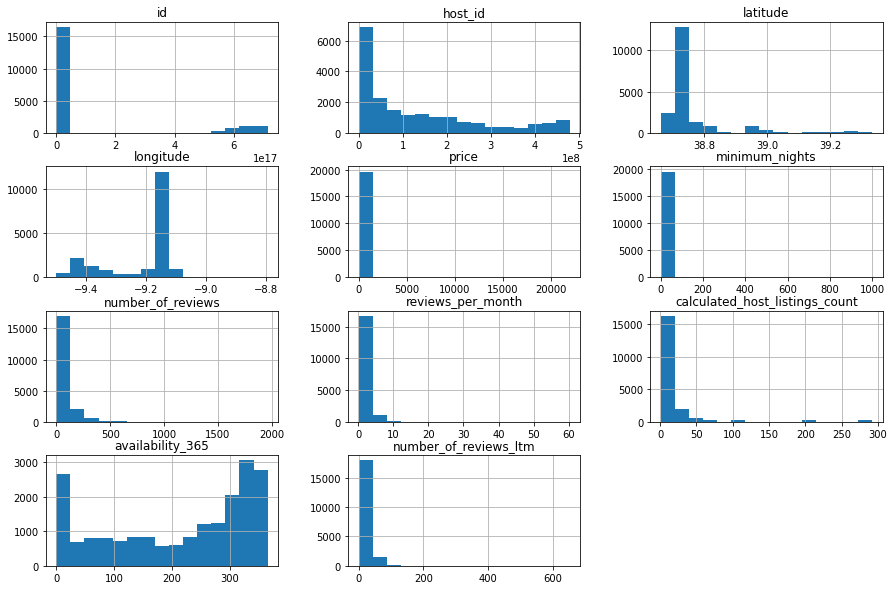

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Neste momento, a finalidade é detectar os *outliers* de variáveis mais relevantes que puxam nossa análise para uma conclusão enviesada em valores que não condizem, na maioria das vezes, com a realidade.

* Na coluna `price`, podemos observar que a média dos preços é `142.822197`, mas o seu valor máximo é `22000.000000`;
* Na coluna `minimum_nights`, enquanto a média se aproxima de `4.000000`, o valor máximo obtido é `1000.000000`;
* `reviews_per_month`, `calculated_host_listings_count` e `availability_365` apresentam o mesmo "problema".

In [ ]:
df[['price', 'minimum_nights','reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,19651.000000,19651.000000,17717.000000,19651.000000,19651.000000
mean,142.822197,3.979899,1.507802,16.245229,211.683070
std,298.507221,15.534765,1.515960,41.784592,124.981629
min,0.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,0.430000,1.000000,96.000000
50%,100.000000,2.000000,1.070000,4.000000,255.000000
75%,152.000000,3.000000,2.170000,13.000000,323.000000
max,22000.000000,1000.000000,60.390000,292.000000,365.000000


* Com a visualização dos dados via gráfico de *boxplot*, podemos estabelecer uma premissa para analisar a representatividade dos *outliers*. Abaixo, analisando a coluna `price`, constatamos que para valores acima de `800`, são retornadas `192 entradas` o que representam `0.9770%` do total de *inputs*.

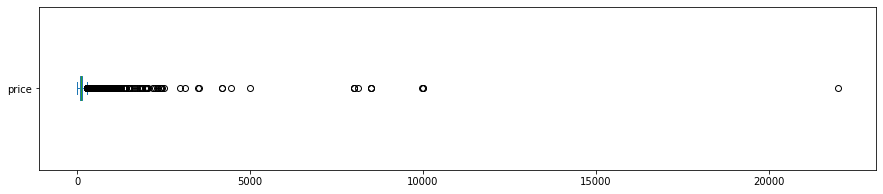


price: valores acima de 800
192 entradas
0.9770%


In [ ]:
# boxplot para detecção de outliers (price)
df.price.plot(kind='box', vert= False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 800 para price
print("\nprice: valores acima de 800")
print("{} entradas".format(len(df[df.price > 800])))
print("{:.4f}%".format((len(df[df.price > 800]) / df.shape[0])*100))

* Para a coluna `minimum_nights`, o valor de corte se da em `31 dias`, que retornam `103 entradas` com a representatividade de `0.5241%`do total:


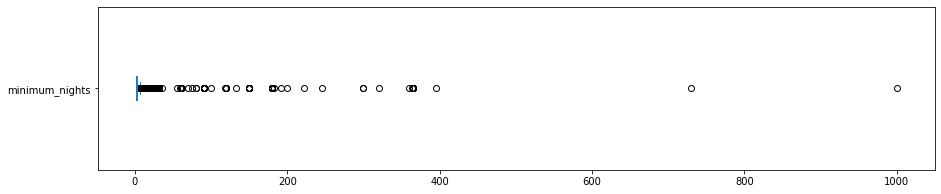


minimum_nights: valores acima de 31:
103 entradas
0.5241%


In [ ]:
# boxplot para detecção de outliers (minimum_nights)
df.minimum_nights.plot(kind='box', vert= False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 31 dias para minimum_nights
print("\nminimum_nights: valores acima de 31:")
print("{} entradas".format(len(df[df.minimum_nights > 31])))
print("{:.4f}%".format((len(df[df.minimum_nights > 31]) / df.shape[0])*100))

* Se definíssemos o corte na quantidade de `30 dias`, obteríamos uma representatividade de `1.0076%` do total de entradas que, para esta análise, julgamos ser um valor considerável:

In [ ]:
# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
198 entradas
1.0076%


* Nesta etapa, após identificarmos os *outliers* e estabelecermos nosso valores de cortes de maneira que o impacto no *dataset* seja inexpressível, iremos de fato removê-los criando uma nova variável, a `df_clean`:  

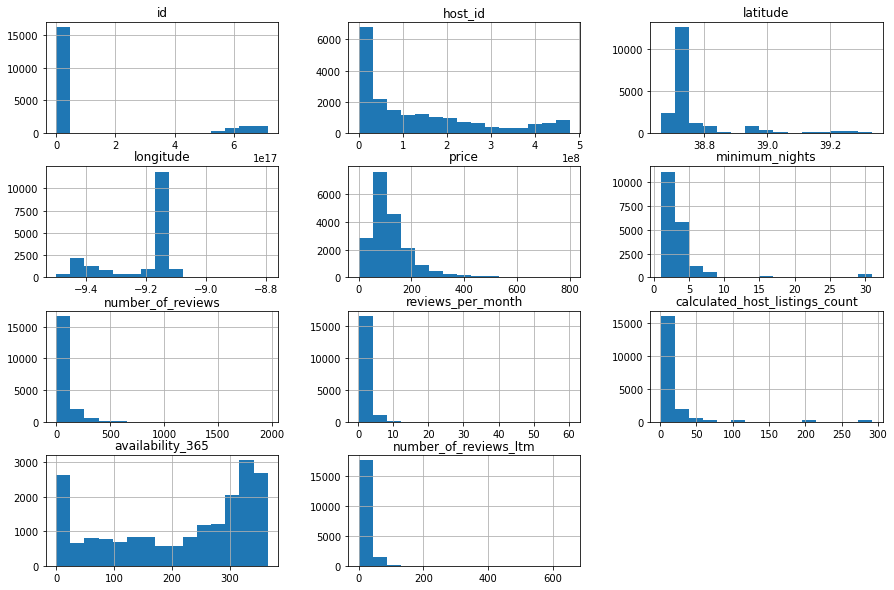

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis?**

A matriz de correlação tem por objetivo identificar como o movimento de duas variáveis está interligado. Tomemos como exemplo duas variáveis, `X` e `Y`. Em uma `correlação positiva`, o aumento de `X` implicaria no aumento de `Y`. Já em uma `correlação negativa`, o movimento seria inverso: Se `X` aumentasse, `Y` diminuiria na mesma proporção. Vejamos abaixo: 

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.038145,-0.088992,-0.065968,0.075707,0.092081
minimum_nights,-0.038145,1.000000,-0.101298,-0.155901,-0.053761,-0.073954
number_of_reviews,-0.088992,-0.101298,1.000000,0.547539,-0.084869,0.007902
reviews_per_month,-0.065968,-0.155901,0.547539,1.000000,-0.048865,0.102729
calculated_host_listings_count,0.075707,-0.053761,-0.084869,-0.048865,1.000000,0.055517
availability_365,0.092081,-0.073954,0.007902,0.102729,0.055517,1.000000


* Para melhor visualizarmos a matriz de correlação, plotaremos abaixo um *heatmap* utilizando a biblioteca `seaborn` que importamos na primeira linha de código:

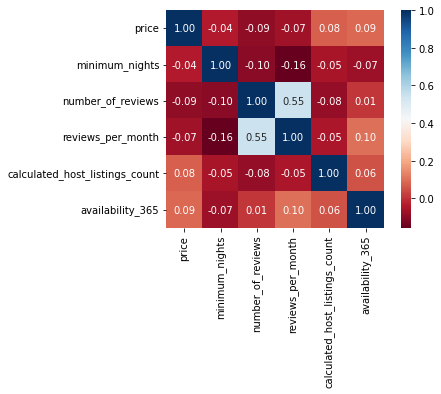

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

* O objetivo aqui é analisarmos qual espécie de imóvel é o mais locado. Disparadamente `Entire home/apt` lidera o ranking com o valor de `14877`. Isso é devido também a uma maior disponibilidade em relação aos outros tipos de locação. No segundo bloco de código a seguir, podemos verificar que esta disponibilidade representa `76.851948%` do total:

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14877
Private room        4022
Hotel room           234
Shared room          225
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    76.851948
Private room       20.776940
Hotel room          1.208803
Shared room         1.162310
Name: room_type, dtype: float64

* Uma breve descrição sobre `Entire Places`, disponibilizada no site referenciado para esta base de dados:

> "Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: ""Host occupies first floor of the home""), and provide further details on the listing."




 








### **Q8. Qual a localidade mais cara do dataset?**

Em uma análise superficial, podemos facilmente definir a localidade mais cara, baseado em nosso *dataset*, tirando a média dos valores dos *inputs* da coluna `price`, e obtemos como resultado o bairro de `Ota`:



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ota                                                410.000000
Alguber                                            340.000000
Aveiras de Baixo                                   336.666667
Cardosas                                           306.000000
Vale do Paraso                                     260.000000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    208.666667
Freiria                                            205.500000
Santa Brbara                                       202.794118
Ribamar                                            196.863636
Vermelha                                           192.250000
Name: price, dtype: float64

* Aqui podemos observar geograficamente onde há a maior concentração de locações em `Lisboa`, plotando os imóveis pelas latitudes e longitudes fornecidas, neste caso, se necontra na região periférica porção leste e na porção sul, área costeira:


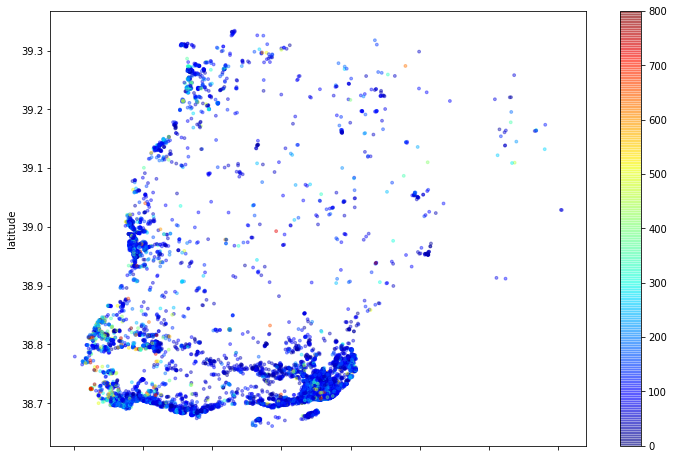

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Com base no *dataset* importado, foi feita uma análise superficial dos dados da `Airbnb` para a localidade de `Lisboa`. Baseado nisso, podemos tirar as seguintes conclusões:

* A expressividade de valores ausentes nas colunas em sua maioria é nula ou é muito baixa, não necessitando um tratamento inicial; 
* Existe a presença de *outliers*, para uma análise mais profunda, teria de ser averiguado a necessidade de manter estes valores, se eles são reais, o entender o porquê da discrepância em relação as outras entradas;
* A correlação entre diferentes variáveis é, em sua maioria, negativa ou próxima a `0.0` que, com base neste nível de observação, não permite inferir algum *insight*;
* `Entire places` são o tipo de acomodação mais procurado para aluguel;
* A localidade mais cara disponível para locação dada pela coluna `neighbourhood` é em `Ota`. Em uma visão mais minuciosa, procuraria-se verificar se de fato condiz com os preços da região, ou se algo estaria enviesando este resultado;
* Por último, verifica-se que as regiões mais procuradas para aluguel estão fortemente concentradas a Leste, e ao Sul de Lisboa.